In [1]:
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from IPython.display import clear_output
from ipywidgets import interact, IntSlider
import ipywidgets as widgets
import pickle
import numpy as np
import torch

In [74]:
with open('dumps/dump_2024-10-11 16:09:22.148791-2-prey_captured.pkl','rb') as f:
    dump = pickle.load(f)

In [75]:
msg_array, obs_array, views, prey_pos, agent_pos = [],[],[],[],[]
for d in dump:
    obs, all_msg, view, p, a = d
    msg_array.append(all_msg)
    obs_array.append(obs)
    views.append(view)
    prey_pos.append(p)
    agent_pos.append(a)

In [76]:
msg = torch.cat(msg_array,axis=0).detach().cpu()
obs_array = np.array(obs_array)
views = np.array(views)
prey_pos = np.array(prey_pos)
agent_pos = np.array(agent_pos)

In [77]:
import numpy as np
import matplotlib.pyplot as plt
from ipywidgets import interact, IntSlider
import ipywidgets as widgets

# Function to plot a specific 2D array
def plot_array(index):
    plt.figure(figsize=(10,7))
    plt.subplot(2,2,1)
    plt.imshow(views[index], cmap='viridis', interpolation='none')

    plt.subplot(2,2,2)
    pca = PCA(n_components=2)
    
    pca.fit_transform(msg.reshape(-1,36))

    plt.xlim(-0.1,0.1)
    plt.ylim(-0.1,0.1)

    # Specify interest region
    start_time = index
    end_time = index+1
    
    agent_0_comm = pca.transform(msg[:,0])
    agent_1_comm = pca.transform(msg[:,1])
    agent_2_comm = pca.transform(msg[:,2])
    agent_3_comm = pca.transform(msg[:,3])

    plt.scatter(*(agent_0_comm[np.arange(start_time,end_time)].T))
    plt.scatter(*(agent_1_comm[np.arange(start_time,end_time)].T))
    plt.scatter(*(agent_2_comm[np.arange(start_time,end_time)].T))
    plt.scatter(*(agent_3_comm[np.arange(start_time,end_time)].T))


    plt.subplot(2,2,(3,4))
    intencity = (msg**2).mean(axis=2)
    plt.plot(intencity)
    plt.scatter([index]*4,intencity[index],c='black')



# Create an interactive slider to choose which 2D array to display
interact(plot_array, index=IntSlider(min=0, max=len(views)-1, step=1, value=0))
plt.show()


interactive(children=(IntSlider(value=0, description='index', max=40), Output()), _dom_classes=('widget-intera…

AttributeError: module 'numpy' has no attribute 'arangeindex'

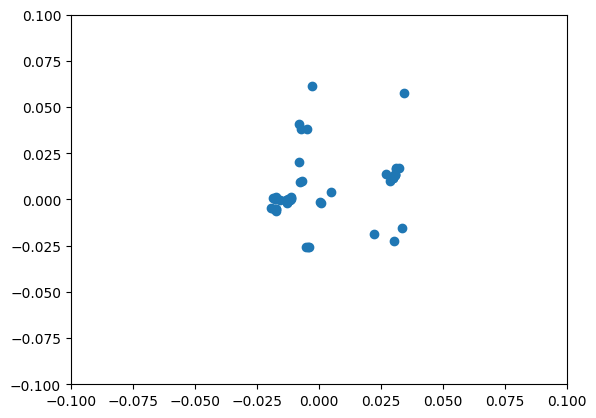

In [33]:
pca = PCA(n_components=2)
    
pca.fit_transform(msg.reshape(-1,10))

plt.xlim(-0.1,0.1)
plt.ylim(-0.1,0.1)

# Specify interest region
start_time = 0
end_time = 47

agent_0_comm = pca.transform(msg[:,0])
agent_1_comm = pca.transform(msg[:,1])
agent_2_comm = pca.transform(msg[:,2])
agent_3_comm = pca.transform(msg[:,3])

plt.scatter(*(agent_0_comm[np.arange(start_time,end_time)].T))
plt.scatter(*(agent_1_comm[np.arangeindex(start_time,end_time)].T))
plt.scatter(*(agent_2_comm[np.arange(start_time,end_time)].T))
plt.scatter(*(agent_3_comm[np.arange(start_time,end_time)].T))
